In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import tools
import importlib
from IPython.display import HTML
import xarray as xr

In [3]:
importlib.reload(tools)

<module 'tools' from '/Users/clemensrohling/PycharmProjects/Ocean_Model/tools.py'>

In [86]:
base_path = "/Users/clemensrohling/Desktop/Uni/Ocean and Climate Physics/Semester 3/Ocean/Temperature/"
name = "20.12.-1.59-0.95.txt"
name = "run_ 29.11.-35.8_36.5.txt"

name = "13.12.-0.96-1.40.txt"
name = "20.12.-1.59-0.95.txt"
name = "13.12.-1.75-0.96.txt"

z_positions = {
    '03': np.arange(0, 15, 2),  # Stick 03: z = 0 to 14
    '02': np.arange(1, 16, 2),  # Stick 02: z = 1 to 15
    '01': np.arange(10.5, 25.5, 2),  # Stick 01: z = 10.5 to 24.5
    '00': np.arange(11.5, 26.5, 2)  # Stick 00: z = 11.5 to 25.5
}
t = tools.TemperatureProcessor(base_path + name, z_positions=None)
t.read_data()
t.process_data_to_xarray()
t_sticks = t.dataset

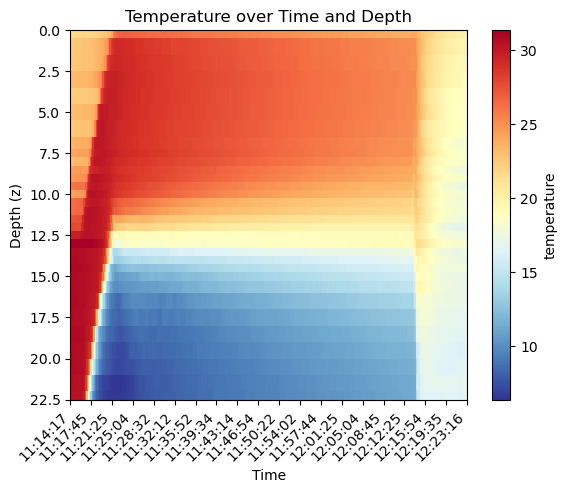

In [87]:
# Extract the indices of the time coordinate
time_indices = np.arange(len(t_sticks['time']))

# Select 20 evenly spaced indices
selected_indices = np.linspace(0, len(time_indices) - 1, 20, dtype=int)

# Plot the temperature data
t_sticks.temperature.plot(x='time', y='z', cmap='RdYlBu_r', vmin=t_sticks.temperature.min(), vmax=t_sticks.temperature.max())

# Set the x-axis ticks to the selected indices
plt.gca().set_xticks(selected_indices)

# Optionally, set the x-axis labels to the corresponding time values
plt.gca().set_xticklabels(t_sticks['time'].values[selected_indices], rotation=45, ha='right')

plt.gca().invert_yaxis()
plt.xlabel('Time')
plt.ylabel('Depth (z)')
plt.title('Temperature over Time and Depth')
plt.savefig('temperature.png', bbox_inches='tight', dpi=300)
plt.savefig('temperature.pdf', bbox_inches='tight')
plt.show()

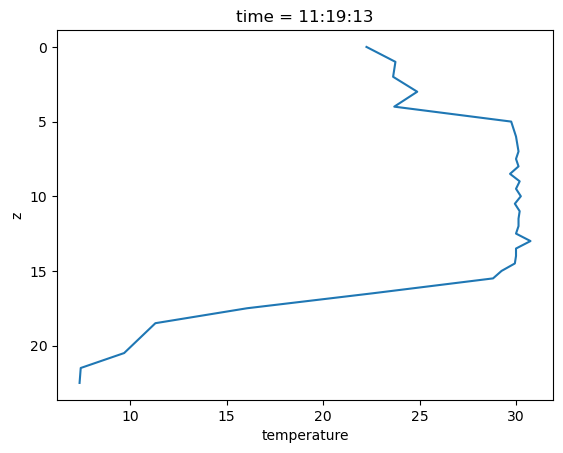

In [98]:
t_sticks.isel(time= 80).temperature.plot(y = "z")
plt.gca().invert_yaxis()
plt.savefig("t_profile.pdf")

In [29]:
t_sticks.temperature

<xarray.DataArray 'temperature' (time: 714, z: 32)>
array([[  nan,   nan,   nan, ..., 30.13,   nan, 29.94],
       [  nan,   nan,   nan, ..., 30.13, 29.94, 29.94],
       [  nan, 20.  ,   nan, ..., 30.13, 29.94, 29.94],
       ...,
       [24.44, 25.56, 25.75, ..., 18.06, 17.69, 17.63],
       [24.44, 25.56, 25.69, ..., 18.06, 17.69, 17.63],
       [24.44, 25.56, 25.69, ..., 18.06, 17.69, 17.63]])
Coordinates:
  * time     (time) <U8 '13:34:35' '13:34:36' ... '14:19:45' '14:19:57'
  * z        (z) float64 0.0 1.0 2.0 3.0 4.0 5.0 ... 18.5 19.5 20.5 21.5 22.5

In [99]:
import pandas as pd
offsets = pd.read_csv("offset_matrix.csv")
offsets

,0,1,2,3,4
0,-0.13135,0.08865,0.08865,-0.03635,0.04065
1,-0.10135,-0.09535,0.06465,-0.03735,-0.02335
2,-0.01635,0.01665,0.03465,-0.02335,-0.07635
3,0.04665,-0.05835,-0.06335,-0.08935,0.03465
4,0.01665,-0.01735,-0.00435,-0.11335,0.06465
5,0.04065,-0.10135,0.01065,0.04665,-0.04135
6,0.04065,-0.02335,0.66065,-0.08935,-0.01635
7,0.04665,-0.07135,-0.06535,-0.02335,-0.02335


In [107]:
t.data.keys()

Index(['Time', 'Stick', 'Temp_0', 'Temp_1', 'Temp_2', 'Temp_3', 'Temp_4',
       'Temp_5', 'Temp_6', 'Temp_7'],
      dtype='object')

In [108]:
offsets.keys()

Index(['0', '1', '2', '3', '4'], dtype='object')